# Zabbix & LSF data analysis

## Read preprocessed data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
from sklearn import datasets, linear_model
import datetime
import time
import warnings
warnings.filterwarnings(action='ignore')
Working_dir = os.getcwd()

In [63]:
# zabbix_df = pd.read_excel( os.path.join( Working_dir, "zabbix_v2_py.xlsx" ) )
# lsf_df = pd.read_excel( os.path.join( Working_dir, "lsf_v2_py.xlsx" ) )
zabbix_month_df = pd.read_excel( os.path.join( Working_dir, "zabbix_month_py.xlsx" ) )
lsf_month_df = pd.read_excel( os.path.join( Working_dir, "lsf_month_py.xlsx" ) )

In [64]:
# lsf_month_df['directory of running executable'] = lsf_month_df['directory of running executable'].fillna('')
# lsf_month_df['name of executable'] = lsf_month_df['name of executable'].fillna('')

In [4]:
# apps_at_time_df = pd.read_excel( os.path.join( Working_dir, "apps_at_time_py.xlsx" )  )

In [6]:
# proc_df = pd.read_excel( os.path.join( Working_dir, "proc_matrix.xlsx" ) )
proc_df = pd.read_excel( os.path.join( Working_dir, "proc_matrix_less_coeff_month.xlsx" ) )
proc_df.index=proc_df.iloc[:,0]
proc_df.drop('timestamp_py', axis=1, inplace=True)

In [8]:
proc_df.head()

,/gporq1_minni/minni/QA/mario/Q,PFS/porq1_1M/SiH/test_optimizecp2k_launch.sh,/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t128k_shared.s,/gporq1_minni/minni/QA/mario/QHOSTFILE=$LSB_DJOB_HOSTFILE,/gporq1_minni/minni/QA/mario/Q/gporq1_minni/minni/QA/mario/Q,minnirams/soft/script/ramscresco4x262.portici.enea.it,cresco4x001.portici.enea.it./submit.sh,/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t1m_fileperpro,PADRactions/4LOSEDGE/FILLEDCOLblaunch_mcnp,PORT_INTEGRATION/Advantg/TNSM_blaunch_mcnp,...,/gporq1_clima0/regcm/Exp/Med-2./MED-20_2.sh,minnirams/soft/script/ramscresco4x296.portici.enea.it,minnirams/soft/script/ramscresco4x145.portici.enea.it,PFS/porq1_1M/LiC/GeO2/co.60/13#!/bin/sh;CPMD_PPS_DIR=$HOME/D,minnirams/soft/script/ramscresco4x144.portici.enea.it,Rez_proton_beam/Test_sourceblaunch_mcnp,PFS/porq1_256k/Ti02_001_4x4_sl./job_espresso.cresco4_dos.sh,PFS/porq1_256k/Ti02_001_4x4_sl./job_espresso.cresco4_pdos.sh,PFS/porq1_256k/H2O_TiO2_001_4x./job_espresso.cresco4_dos.sh,PFS/porq1_256k/H2O_TiO2_001_4x./job_espresso.cresco4_pdos.sh
timestamp_py,,,,,,,,,,,,,,,,,,,,,
2017-02-19 12:00:00,0.001111,0.000000,1024.0,0.0,0.0,512.0,1632.0,1024.0,800.0,1600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 13:00:00,0.000000,0.000000,1024.0,0.0,0.0,512.0,1632.0,1024.0,800.0,1600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 14:00:00,0.000000,0.000000,1024.0,0.0,0.0,512.0,1632.0,1024.0,800.0,1600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 15:00:00,0.000000,0.000000,1024.0,0.0,0.0,512.0,1632.0,1024.0,800.0,1600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 16:00:00,0.000000,0.311389,1024.0,0.0,0.0,512.0,1632.0,1024.0,800.0,1600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
proc_max_df = pd.read_excel( os.path.join( Working_dir, "proc_max_matrix_month.xlsx" ) )

In [11]:
proc_max_df.head()

,/gporq1_minni/minni/QA/mario/Q,PFS/porq1_1M/SiH/test_optimizecp2k_launch.sh,/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t128k_shared.s,/gporq1_minni/minni/QA/mario/QHOSTFILE=$LSB_DJOB_HOSTFILE,/gporq1_minni/minni/QA/mario/Q/gporq1_minni/minni/QA/mario/Q,minnirams/soft/script/ramscresco4x262.portici.enea.it,cresco4x001.portici.enea.it./submit.sh,/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t1m_fileperpro,PADRactions/4LOSEDGE/FILLEDCOLblaunch_mcnp,PORT_INTEGRATION/Advantg/TNSM_blaunch_mcnp,...,/gporq1_clima0/regcm/Exp/Med-2./MED-20_2.sh,minnirams/soft/script/ramscresco4x296.portici.enea.it,minnirams/soft/script/ramscresco4x145.portici.enea.it,PFS/porq1_1M/LiC/GeO2/co.60/13#!/bin/sh;CPMD_PPS_DIR=$HOME/D,minnirams/soft/script/ramscresco4x144.portici.enea.it,Rez_proton_beam/Test_sourceblaunch_mcnp,PFS/porq1_256k/Ti02_001_4x4_sl./job_espresso.cresco4_dos.sh,PFS/porq1_256k/Ti02_001_4x4_sl./job_espresso.cresco4_pdos.sh,PFS/porq1_256k/H2O_TiO2_001_4x./job_espresso.cresco4_dos.sh,PFS/porq1_256k/H2O_TiO2_001_4x./job_espresso.cresco4_pdos.sh
2017-02-19 12:00:02,0.000977,0.000000,1.0,0.0,0.0,0.5,1.59375,1.0,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 13:00:00,0.000000,0.000000,1.0,0.0,0.0,0.5,1.59375,1.0,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 14:00:00,0.000000,0.000000,1.0,0.0,0.0,0.5,1.59375,1.0,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 15:00:00,0.000000,0.000000,1.0,0.0,0.0,0.5,1.59375,1.0,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 16:14:00,0.000000,0.000977,1.0,0.0,0.0,0.5,1.59375,1.0,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
proc_min_df = pd.read_excel( os.path.join( Working_dir, "proc_min_matrix_month.xlsx" ) )

In [14]:
proc_min_df.head()

,/gporq1_minni/minni/QA/mario/Q,PFS/porq1_1M/SiH/test_optimizecp2k_launch.sh,/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t128k_shared.s,/gporq1_minni/minni/QA/mario/QHOSTFILE=$LSB_DJOB_HOSTFILE,/gporq1_minni/minni/QA/mario/Q/gporq1_minni/minni/QA/mario/Q,minnirams/soft/script/ramscresco4x262.portici.enea.it,cresco4x001.portici.enea.it./submit.sh,/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t1m_fileperpro,PADRactions/4LOSEDGE/FILLEDCOLblaunch_mcnp,PORT_INTEGRATION/Advantg/TNSM_blaunch_mcnp,...,/gporq1_clima0/regcm/Exp/Med-2./MED-20_2.sh,minnirams/soft/script/ramscresco4x296.portici.enea.it,minnirams/soft/script/ramscresco4x145.portici.enea.it,PFS/porq1_1M/LiC/GeO2/co.60/13#!/bin/sh;CPMD_PPS_DIR=$HOME/D,minnirams/soft/script/ramscresco4x144.portici.enea.it,Rez_proton_beam/Test_sourceblaunch_mcnp,PFS/porq1_256k/Ti02_001_4x4_sl./job_espresso.cresco4_dos.sh,PFS/porq1_256k/Ti02_001_4x4_sl./job_espresso.cresco4_pdos.sh,PFS/porq1_256k/H2O_TiO2_001_4x./job_espresso.cresco4_dos.sh,PFS/porq1_256k/H2O_TiO2_001_4x./job_espresso.cresco4_pdos.sh
2017-02-19 12:00:00,0.0,0.0,1,0,0.0,0.5,1.59375,1,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 13:00:00,0.0,0.0,1,0,0.0,0.5,1.59375,1,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 14:00:00,0.0,0.0,1,0,0.0,0.5,1.59375,1,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 15:00:00,0.0,0.0,1,0,0.0,0.5,1.59375,1,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-19 16:00:00,0.0,0.0,1,0,0.0,0.5,1.59375,1,0.78125,1.5625,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# zabbix_month_df.head()

In [16]:
lsf_month_df.tail()

,jobid,number of cores used,user name,queue name,directory of running executable,name of executable,job status,start unixtime,stop unixtime,start_date_py,start_time_py,end_date_py,end_time_py,executable_full_name
6072,998286,64,denicola,cresco4_16h24,node_up,./mpirun_wrap.lsf,DONE,1489766998,1489964031,2017-03-17,16:09:58,2017-03-19,22:53:51,node_up./mpirun_wrap.lsf
6073,998329,704,wangt,cresco4_256h24,PFS/porq1_1M/2017/caso_2017_Ta,./submit.sh,EXIT,1489833600,1489938511,2017-03-18,10:40:00,2017-03-19,15:48:31,PFS/porq1_1M/2017/caso_2017_Ta./submit.sh
6074,998353,384,wangt,cresco4_256h24,PFS/porq1_1M/2017/caso_2017_Ta,./submit.sh,EXIT,1489906230,1489983969,2017-03-19,06:50:30,2017-03-20,04:26:09,PFS/porq1_1M/2017/caso_2017_Ta./submit.sh
6075,997177,256,eugenio,combustione4,,./bsub_cresco4,EXIT,1489560483,1489572633,2017-03-15,06:48:03,2017-03-15,10:10:33,./bsub_cresco4
6076,998357,64,mancinig,small_h144,PFS/porq1_1M/LiC/GeO2/co.90/Ne,#!/bin/sh;CPMD_PPS_DIR=$HOME/D,DONE,1489923923,1489923929,2017-03-19,11:45:23,2017-03-19,11:45:29,PFS/porq1_1M/LiC/GeO2/co.90/Ne#!/bin/sh;CPMD_P...


In [ ]:
# apps_at_time_df.head()

In [ ]:
# print(zabbix_df.columns.values)
# print(lsf_df.columns.values)

In [ ]:
# apps_at_time_df.describe()

-------

#### All job ids are unique, they cannot be used as an identifier

In [17]:
job_ids = list(lsf_month_df.jobid)
job_ids_dict = dict((x,job_ids.count(x)) for x in job_ids)
all(value == 1 for value in job_ids_dict.values())

True

#### Different processes names can be identifiers

- In the first month

In [18]:
print(len(lsf_month_df.executable_full_name.unique()))
# print(zabbix_month_df.shape[0])

976


In [19]:
l = list(lsf_month_df.executable_full_name)
dict((x,l.count(x)) for x in l)

{'./bsub_cresco4': 53,
 './prova': 4,
 '/afs/.enea.it/project/ha_forec': 361,
 '/afs/.enea.it/project/ha_forecHOSTFILE=$LSB_DJOB_HOSTFILE': 3,
 '/afs/enea.it/project/eocoe/datsleep': 1,
 '/afs/enea.it/project/minnifarm/afs/enea.it/project/minnifarm': 243,
 '/afs/enea.it/project/minnifarm/gporq1_minni/minni//minnifarm': 3,
 '/gpfs_scratch/funel/ior-master./sub.s': 1,
 '/gpfs_scratch/funel/ior-master./sub.sh': 35,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t128k_fileperp': 1,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t128k_shared.s': 2,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t1m_fileperpro': 2,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t1m_shared.sh': 2,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t256m_fileperp': 2,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t256m_shared.s': 2,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t4m_fileperpro': 1,
 '/gpfs_scratch/funel/ior-master./sub_ior_mpiio_t4m_shared.sh': 1,
 '/gporq1_1M/usr/dcecere/HP_10ba./cresco4.

### Undetermined SLAE $Aq = f$ to be solved with unknown q
A - weight matrix ($a_{ij} = $  required cores $\cdot$ time in seconds of job working this hour)

i - job number

j - hour number

q - power required by a job (process) per core per second

f - energy = avg power * 1 hour [here in Wh]

#### Tikhonov method and gradient method with regularisation parameter of minimal errors

In [228]:
A = proc_df.as_matrix()
A = np.asmatrix(A,dtype='float')
At = np.transpose(A)
f = zabbix_month_df['energy_avg (kWh)'].as_matrix()*1000
Af = np.transpose(np.dot(At, f))
B = At * A
# print(type(A), type(At))
# print(type(A[0,0]))
# print(A[0,0])

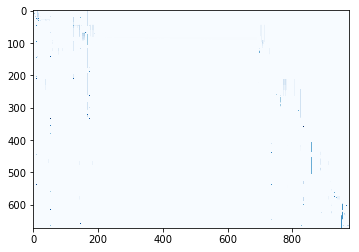

In [118]:
plt.imshow(np.uint8(A), cmap='Blues')
plt.show()

Percentage of non-zero elements

In [119]:
np.count_nonzero(A)/(A.shape[0]*A.shape[1])*100

2.7506891588602653

SVD analysis

In [120]:
u,s,v = np.linalg.svd(A)

In [121]:
print(s[0]/s[s.shape[0]-1])
print(s[0]/s[int(s.shape[0]/4)-1])
print(s.max(), s.min())

2.31057429856e+16
10057.0720698
76868.9613757 3.3268335679e-12


Normal system of equatrions for the initial system

In [123]:
B = At * A

In [124]:
# a = np.matrix([[1,2],[0,3],[0,0]])
# # b = np.matrix([[3,4],[1,2]])
# b = np.matrix([4,1])
# print(type(b))
# print(b.shape, np.transpose(b).shape)
# c = np.dot(a,np.transpose(b))
# print(c, '\n',c.shape)

### OLS

In [153]:
reg = linear_model.LinearRegression()
reg.fit(B, Af)
q_lin_regr = reg.coef_
# print(q_lin_regr.shape)
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,np.transpose(q_lin_regr)) - f)/np.linalg.norm(f))

norm(Aq-f)/norm(f) 4.48573313842


In [150]:
reg.fit(A,f)
q_lin_regr_2 = reg.coef_
# print(q_lin_regr_2)
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lin_regr_2) - f)/np.linalg.norm(f))

norm(Aq-f)/norm(f) 0.945194781838


### Tikhonov

In [148]:
clf = linear_model.Lasso(alpha=10, positive = True,max_iter=100000)
clf.fit(A,f)
q_lasso = clf.coef_
u, counts = np.unique(q_lasso, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso) - f)/np.linalg.norm(f))

zero elements 925
norm(Aq-f) 0.869079938877


In [157]:
clf = linear_model.Lasso(alpha=0.01, positive = True,max_iter=100000)
clf.fit(B,Af)
q_lasso = clf.coef_
u, counts = np.unique(q_lasso, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso) - f)/np.linalg.norm(f))

zero elements 847
norm(Aq-f)/norm(f) 0.671314395165


### Tikhonov + angular

In [167]:
clf_ll = linear_model.LassoLars(alpha=0.7, positive = True,max_iter=10000,copy_X=True)
clf_ll.fit(A,f)
q_lasso_lars = clf_ll.coef_
u, counts = np.unique(q_lasso_lars, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars) - f)/np.linalg.norm(f))

zero elements 914
norm(Aq-f)/norm(f) 0.891871249567


In [168]:
clf_ll = linear_model.LassoLars(alpha=100, positive = True,max_iter=10000,copy_X=True)
clf_ll.fit(B,Af)
q_lasso_lars = clf_ll.coef_
u, counts = np.unique(q_lasso_lars, return_counts=True)
print('zero elements',counts[0])
# print(f.shape, np.dot(A,q_lasso_lars).shape, np.dot(A,q_lasso_lars) - np.transpose(f))
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars) - f)/np.linalg.norm(f))

zero elements 905
norm(Aq-f)/norm(f) 0.538279178205


### LassoLarsCV

In [170]:
clf_ll_cv = linear_model.LassoLarsCV(max_n_alphas=10000, positive = True,max_iter=100000,copy_X=True)
clf_ll_cv.fit(A,f)
q_lasso_lars_cv = clf_ll_cv.coef_
u, counts = np.unique(q_lasso_lars_cv, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars_cv) - f)/np.linalg.norm(f))

zero elements 976
norm(Aq-f) 1.0


In [171]:
clf_ll_cv = linear_model.LassoLarsCV(max_n_alphas=10000, positive = True,max_iter=100000,copy_X=True)
clf_ll_cv.fit(B,Af)
q_lasso_lars_cv = clf_ll_cv.coef_
u, counts = np.unique(q_lasso_lars_cv, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars_cv) - f)/np.linalg.norm(f))

zero elements 905
norm(Aq-f)/norm(f) 0.538279178205


In [260]:
A_end = proc_max_df.as_matrix()
A_end = np.asmatrix(A_end,dtype='float')
np.count_nonzero(A_end)/(A_end.shape[0]*A_end.shape[1])*100

2.616516637392662

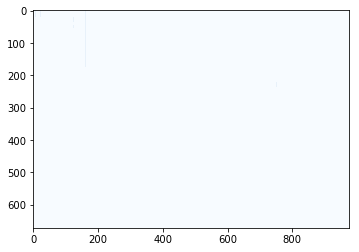

In [136]:
plt.imshow(np.uint8(A_end), cmap='Blues')
plt.show()

In [138]:
zabbix_month_df.columns.values

array(['Start_Timestamp (1h interval)', 'min_power', 'avg_power',
       'max_power', 'measure time in seconds', 'date_py', 'time_py',
       'timestamp_py', 'energy_avg (kWh)', 'energy_min (kWh)',
       'energy_max (kWh)'], dtype=object)

In [261]:
f_end = zabbix_month_df.max_power.as_matrix()

In [140]:
A_full = np.concatenate((A, A_end), axis=0)
print(A_full.shape)

(1344, 976)


### Later: concatenate only rows with big singular values

In [267]:
# A q = f
print(A.shape)
A = A_full
print(A.shape)
At = np.transpose(A)
f = np.concatenate((f,f_end), axis=0)
# B q = At A q = At f
B = At * A
Af = np.transpose(np.dot(At, f))

(672, 976)
(1344, 976)


### SVD truncation of A_full = (A, A_end)

In [270]:
u,s,v = np.linalg.svd(A)

In [278]:
print(s[0]/s[s.shape[0]-1])
sing_val_num = int(s.shape[0]/3.8)
print(s[0]/s[sing_val_num-1])
print(sing_val_num)
# print(s.max(), s.min())

2.86883781045e+16
964835.176835
256


In [279]:
s_begin = np.zeros((u.shape[0], v.shape[0]))
s_begin[:256, :256] = np.diag(s[:256])
A_svd=np.dot(u, np.dot(s_begin, v))
# A_begin

In [280]:
A = A_svd

### OLS

In [282]:
reg = linear_model.LinearRegression()
reg.fit(B, Af)
q_lin_regr = reg.coef_
# print(q_lin_regr.shape)
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,np.transpose(q_lin_regr)) - f)/np.linalg.norm(f))

norm(Aq-f)/norm(f) 25.9861933569


In [283]:
reg.fit(A,f)
q_lin_regr_2 = reg.coef_
# print(q_lin_regr_2)
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lin_regr_2) - f)/np.linalg.norm(f))

norm(Aq-f)/norm(f) 1.01807616379


### Tikhonov

In [284]:
clf = linear_model.Lasso(alpha=10, positive = True,max_iter=100000)
clf.fit(A,f)
q_lasso = clf.coef_
u, counts = np.unique(q_lasso, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso) - f)/np.linalg.norm(f))

zero elements 945
norm(Aq-f)/norm(f) 0.982799465856


In [285]:
clf = linear_model.Lasso(alpha=0.01, positive = True,max_iter=100000)
clf.fit(B,Af)
q_lasso = clf.coef_
u, counts = np.unique(q_lasso, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso) - f)/np.linalg.norm(f))

zero elements 847
norm(Aq-f)/norm(f) 0.79443604796


### Tikhonov + angular

In [286]:
clf_ll = linear_model.LassoLars(alpha=0.7, positive = True,max_iter=10000,copy_X=True)
clf_ll.fit(A,f)
q_lasso_lars = clf_ll.coef_
u, counts = np.unique(q_lasso_lars, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars) - f)/np.linalg.norm(f))

zero elements 924
norm(Aq-f)/norm(f) 0.980631359141


In [287]:
clf_ll = linear_model.LassoLars(alpha=100, positive = True,max_iter=10000,copy_X=True)
clf_ll.fit(B,Af)
q_lasso_lars = clf_ll.coef_
u, counts = np.unique(q_lasso_lars, return_counts=True)
print('zero elements',counts[0])
# print(f.shape, np.dot(A,q_lasso_lars).shape, np.dot(A,q_lasso_lars) - np.transpose(f))
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars) - f)/np.linalg.norm(f))

zero elements 1
norm(Aq-f)/norm(f) 0.79781521197


### LassoLarsCV

In [288]:
clf_ll_cv = linear_model.LassoLarsCV(max_n_alphas=10000, positive = True,max_iter=100000,copy_X=True)
clf_ll_cv.fit(A,f)
q_lasso_lars_cv = clf_ll_cv.coef_
u, counts = np.unique(q_lasso_lars_cv, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars_cv) - f)/np.linalg.norm(f))

ValueError: A value in x_new is below the interpolation range.

In [289]:
clf_ll_cv = linear_model.LassoLarsCV(max_n_alphas=10000, positive = True,max_iter=100000,copy_X=True)
clf_ll_cv.fit(B,Af)
q_lasso_lars_cv = clf_ll_cv.coef_
u, counts = np.unique(q_lasso_lars_cv, return_counts=True)
print('zero elements',counts[0])
print(r'norm(Aq-f)/norm(f)',np.linalg.norm(np.dot(A,q_lasso_lars_cv) - f)/np.linalg.norm(f))

zero elements 1
norm(Aq-f)/norm(f) 0.832632735022


### A, A_end - SVD truncation, then merge to A_full - will not work, because cond number of matrices is not linear for summation

-----

### Sum of coefficients * x = avg energy each hour
Same for maximum

Same for minimum

Find x, take avg of all x

In [58]:
f = zabbix_month_df['energy_avg (kWh)'].as_matrix()*1000
# f_max = zabbix_month_df['energy_max (kWh)'].as_matrix()#*1000
# f_min = zabbix_month_df['energy_min (kWh)'].as_matrix()#*1000
# f_max = zabbix_month_df.max_power.as_matrix()
# f_min = zabbix_month_df.min_power.as_matrix()

In [59]:
sum_coeff_avg = proc_df.sum(axis=1)
# sum_coeff_max = proc_max_df.sum(axis=1)/3600
# sum_coeff_min = proc_min_df.sum(axis=1)/3600
# lsf_df["start unixtime"].apply(lambda x: datetime.datetime.utcfromtimestamp(x).date())

In [60]:
x_avg = f/sum_coeff_avg
# x_min = f_max/sum_coeff_max
# x_max = f_min/sum_coeff_min

In [61]:
# x = (np.mean(x_avg) + np.mean(x_max) + np.mean(x_min))/3.
x = np.mean(x_avg)
print('Power used by one app per one core during one second =', x, 'W')
# print(np.mean(x_avg), np.mean(x_max),  np.mean(x_min))

Power used by one app per one core during one second = 7.719591136029194 W


In [62]:
print('Power used during the month: ', f.sum(), 'Wh')

Power used during the month:  31140764.4167 Wh


----
### With the setimation of power used per app per second per core (above) make estimations on energy consumption: monthly energy loss for "exit" jobs, monthly energy consupmtion rate, etc

-----------------

### Percent of not finished jobs

In [ ]:
exit_jobs = sum(1 for item in lsf_df['job status'] if item.lower() == "exit")
exit_jobs/lsf_df.shape[0]*100

### Percent of not finished jobs in the period 19.02.2017-19.03.2017 

In [ ]:
exit_jobs_month = sum(1 for item in lsf_month_df['job status'] if item.lower() == "exit")
exit_jobs_month/lsf_month_df.shape[0]*100

### Percent of not finished jobs for which directory was "NaN" in the whole dataset

In [ ]:
exit_jobs_no_dir = sum(1 for index, row in lsf_df.iterrows() if (row['job status'].lower() == "exit" and \
                      str(row['directory of running executable']).lower() == 'nan' ))

In [ ]:
exit_jobs_no_dir/lsf_df.shape[0]*100

### Percent of not finished jobs for which name of executable was NaN in the whole dataset 

In [ ]:
exit_jobs_no_name = sum(1 for index, row in lsf_df.iterrows() if (row['job status'].lower() == "exit" and \
                      str(row['name of executable']).lower() == 'nan' ))
exit_jobs_no_name/lsf_df.shape[0]*100

-------------------

### Cresco4 description from DC4Cities D7.2 


The system is composed of 38 Supermicro F617R3–FT chassis, each hosting 8 dual CPU nodes. Each CPU, specifically an Intel E5–2670, hosts 8 cores, for a total number of 4864 cores. These operate at a clock frequency of 2.6 GHz. The system is provided with a RAM memory of 4 GB per core.


----------------

## How much energy is consumed by one core

#### Fristly, how many cores were running per hour - impossible to say exactly.
There are situations when an application used only one core, whereas another application used 4000 cores. The core used for the first application may be within the number of 4000 cores used for the second application or another extra core - equally

----------------

#### Check that each line in lsf correspond to one application, unlike in previous dataset, when <=4 consequtive lines corresponded to one app and showed different stages

#### Add number of cores: avg, min, max at a time which a process required during this hour 

In [ ]:
len(lsf_month_df['jobid'].unique()) == lsf_month_df.shape[0]

----------

### Power per application - rough estimation

In [ ]:
import matplotlib.pyplot as plt

#define font size
plt.rc('font', family='serif', serif='Times New Roman', size = '16' )

fig = plt.figure(figsize=(10, 8), dpi=500)

plt.plot(apps_at_time_df.timestamp_py, apps_at_time_df.power_avg/apps_at_time_df.apps_running, \
                 linestyle="-", \
                 linewidth=2, color = "k")
# beautify the x-labels
plt.gcf().autofmt_xdate()
#labels
plt.xlabel("Timestamp", size = 16 )
plt.ylabel("Power, Wt", size = 16)

plt.show()
fig.savefig( Working_dir + "//power_per_apps_time.png" )

In [ ]:
#define font size
plt.rc('font', family='serif', serif='Times New Roman', size = '16' )

fig = plt.figure(figsize=(10, 8), dpi=500)

plt.scatter(apps_at_time_df.apps_running-apps_at_time_df.apps_ended_this_hour, \
            apps_at_time_df.power_avg,\
            color = "b")
# beautify the x-labels
plt.gcf().autofmt_xdate()
#labels
plt.xlabel("No of apps", size = 16 )
plt.ylabel("Power, Wt", size = 16)

plt.show()
fig.savefig( Working_dir + "//power_vs_apps.png" )

In [ ]:
apps_at_time_df.apps_ended_this_hour.max()

-------------

## Apps names and consumption analysis

In [ ]:
lsf_month_df.columns.values

In [ ]:
apps_names_df = lsf_month_df.iloc[:, 4:6]
apps_names_df.head()

In [ ]:
apps_names_df[['start_date_py', 'start_time_py', 'end_date_py', 'end_time_py']] = lsf_month_df[['start_date_py', 'start_time_py', 'end_date_py', 'end_time_py']]

In [ ]:
apps_names_df.head()

In [ ]:
apps_names_df.sort_values(['name of executable', 'directory of running executable'])

---------------

Simple statistic about Zabbix datasheet

In [ ]:
zabbix_month_df.describe()

Simple statistics about LSF datasheet

In [ ]:
lsf_month_df.describe()

----------